In [23]:
import import_ipynb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.model_selection import validation_curve


In [24]:
from os import chdir
chdir('/Users/aminrimdans/Documents/GitHub/Naveena_Daniel_Data606/EDA')
import ETL_EDA
chdir('/Users/aminrimdans/Documents/GitHub/Naveena_Daniel_Data606')
import NLP


In [27]:
#Balancing the data
X = NLP.X
y = ETL_EDA.df['Event Classification']

AttributeError: module 'NLP' has no attribute 'X'

In [ ]:
X.shape

(78451, 22733)

In [ ]:
y.shape

(78451,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(54915, 22733)

In [ ]:
X_test.shape

(23536, 22733)

<AxesSubplot:ylabel='Event Classification'>

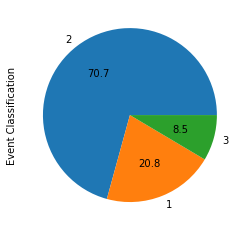

In [ ]:
y.value_counts().plot.pie(autopct='%.1f')

In [ ]:
#over sample minority class and under sample majority class with smote 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE()
undersample = RandomUnderSampler()
s = [("o", oversample),("u", undersample)]
pipeline = Pipeline(steps=s)
X_train,y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
c = Counter(y_train)
for k,v in c.items():
    dist = v/len(y)*100
    print(f"class={k},n={v} ({dist}%)")

class=1,n=38796 (49.45252450574244%)
class=2,n=38796 (49.45252450574244%)
class=3,n=38796 (49.45252450574244%)


<AxesSubplot:ylabel='Event Classification'>

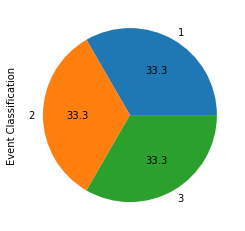

In [ ]:
y_train.value_counts().plot.pie(autopct='%.1f')

In [ ]:
knn, rf, lor, kfold = KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=30000), KFold(3)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# knn_model = RandomizedSearchCV(knn, {'n_neighbors':[5,10,15]}, cv=kfold, scoring=accuracy_score)
# rf_model = RandomizedSearchCV(rf, {'n_estimators':[20,50,100,200]}, cv=kfold, scoring=accuracy_score)
# lor_model = RandomizedSearchCV(lor, {'max_iter':30000}, cv=kfold, scoring=accuracy_score)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
lor.fit(X_train,y_train)

LogisticRegression(max_iter=30000)

Five most important features according to RandomForestClassifier

In [ ]:
imp_feat = rf.feature_importances_.argsort()[-5:]
[NLP_updated.vect_df.columns[i] for i in imp_feat]

['baxter', 'consolidated', 'ampt', 'ibuprofen', 'observing']

In [ ]:
#prediction for test
knn_yhat = knn.predict(X_test)
rf_yhat = rf.predict(X_test)
lor_yhat = lor.predict(X_test)

In [ ]:
X_test

<23536x22733 sparse matrix of type '<class 'numpy.int64'>'
	with 306083 stored elements in Compressed Sparse Row format>

In [ ]:
#prediction for train
#knn_trainp = knn.predict(X_train)
rf_trainp = rf.predict(X_train)
#lor_trainp = lor.predict(X_train)

In [ ]:
#accuracy before hyperparameter tuning 
print('KNN:',accuracy_score(y_test,knn_yhat), 'RandomForest',accuracy_score(y_test, rf_yhat), 'Logistic Regression',accuracy_score(y_test, lor_yhat))

KNN: 0.7572654656696125 RandomForest 0.8965839564921821 Logistic Regression 0.8556254248810333


In [ ]:
accuracy_score(y_train, rf_trainp)

0.9678661030346771

In [ ]:
#check for the prediction 

In [ ]:
input2 = "Apheresis Red Blood Cell products, for which quality control for residual WBC count was not performed, were distributed"

In [ ]:
input_ = "Apheresis Red Blood Cell products, for which quality control for residual WBC count was not performed, were distributed"

In [ ]:
input2 = [input2]

In [ ]:
input_ = [input_]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()

In [ ]:
o = cvec.fit_transform(input2) #vectorization 

In [ ]:
o

NameError: name 'o' is not defined

In [ ]:
Without_reshape = cvec.fit_transform(input_) #vectorization 

In [ ]:
print(o) #shape matches df

  (0, 0)	1
  (0, 11)	1
  (0, 1)	1
  (0, 2)	1
  (0, 9)	1
  (0, 6)	2
  (0, 16)	1
  (0, 10)	1
  (0, 3)	1
  (0, 12)	1
  (0, 14)	1
  (0, 4)	1
  (0, 13)	1
  (0, 7)	1
  (0, 8)	1
  (0, 15)	1
  (0, 5)	1


In [ ]:
o = (np.asarray((o)))

<IPython.core.display.Javascript object>

In [ ]:
out_reshape = o.reshape(-1,1)

In [ ]:
print(out_reshape)

[[<1x17 sparse matrix of type '<class 'numpy.int64'>'
  	with 17 stored elements in Compressed Sparse Row format>]]


In [ ]:
rf.predict(out_reshape)

ValueError: setting an array element with a sequence.